## Observations and Insights 

In [ ]:
# Observations

#1. There is a strong positive correlation between the weight of a mouse and the tumor size. The r-squared value is 0.71 
#indicating a strong correlation. As the weight of the mouse increases, the size of the tumor increases as well.
#2. The box and whiskers plot shows that Infubinol and Ceftamin may not be the best treatment option available. Both treatments
#show a large range as well as iqr in the final tumor size. Both are much larger than the ranges displayed by Ramicane and 
#Capomulin.
#3. Capomulin proved to be an effective treatment for mouse s185 as shown in the line graph. It's clear by the graph that
#the size of the tumor is steadily decreasing in volume over time. This would be a good graph to construct for all mice
#and grouped by the treatment each mouse received to see the effectiveness of each drug treatment over time.
#4. Another consideration would be if the sex of the mouse varied the effectiveness of the treatment. This could be shown
#with a line graph for each treatment showing average tumor size over time with a different line for male and female mice.

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import random
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
allData = pd.merge(mouse_metadata,study_results,on="Mouse ID", how="outer")

# Display the data table for preview
allData.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [24]:
# Checking the number of mice.
numMice = allData["Mouse ID"].count()
numMice

1893

In [25]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateMice = allData[allData.duplicated(['Mouse ID', 'Timepoint'])]
duplicateMice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [26]:
# Optional: Get all the data for the duplicate mouse ID. 
allData = allData.drop_duplicates(subset=['Mouse ID','Timepoint'])
allData.head(10)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [27]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [28]:
# Checking the number of mice in the clean DataFrame.
newNumMice = allData["Mouse ID"].count()
newNumMice

1888

## Summary Statistics

In [43]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

tumorMean = allData.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
tumorMedian = allData.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumorVar = allData.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumorSTD = allData.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumorSEM = allData.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

tumorStats = pd.DataFrame({"Mean":tumorMean, "Median": tumorMedian, "Variance": tumorVar,
                          "Standard Deviation": tumorSTD, "SEM": tumorSEM})
tumorStats
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [59]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumorStatsAgg = allData.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
tumorStatsAgg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

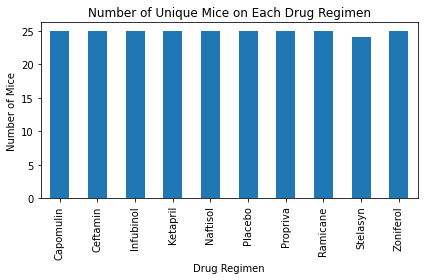

In [68]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
miceDR = allData[["Mouse ID", "Drug Regimen"]]
miceDR = miceDR.groupby(["Drug Regimen"])["Mouse ID"].nunique()
miceDR.plot(kind="bar")
plt.title("Number of Unique Mice on Each Drug Regimen")
plt.ylabel("Number of Mice")
plt.tight_layout()


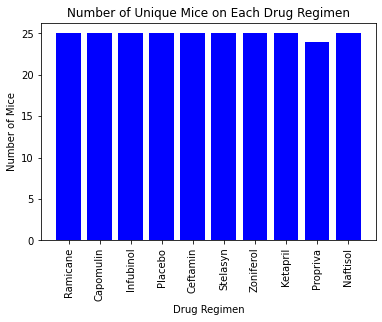

In [67]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
mice = allData.groupby(["Drug Regimen"])["Mouse ID"].nunique()
drugIndex = allData["Drug Regimen"].unique()

plt.bar(drugIndex, mice, color = "blue", align = "center")
plt.xticks(rotation=90)
plt.title("Number of Unique Mice on Each Drug Regimen")
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")
plt.show()


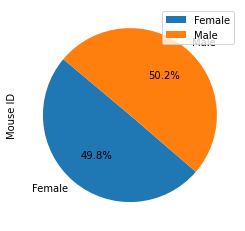

In [62]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = allData[["Sex", "Mouse ID"]]
gender = gender.groupby(["Sex"])["Mouse ID"].nunique()
gender.plot(kind='pie', autopct='%1.1f%%', startangle=140, shadow=False, legend = True)
plt.show()


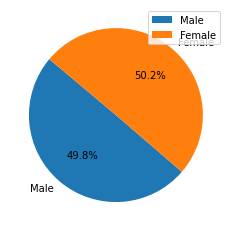

In [60]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(gender, labels = allData["Sex"].unique(), autopct="%1.1f%%", startangle = 140)
plt.legend(loc="upper right")
plt.show()

## Quartiles, Outliers and Boxplots

In [35]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
finalTumor = allData.groupby(["Mouse ID"]).max()
finalTumorData = finalTumor.loc[(finalTumor["Drug Regimen"] == "Capomulin") | (finalTumor["Drug Regimen"]=="Infubinol") |
                                (finalTumor["Drug Regimen"] == "Ramicane") |
                                (finalTumor["Drug Regimen"] == "Ceftamin"),["Drug Regimen","Tumor Volume (mm3)"]]


capData = finalTumorData.loc[finalTumorData["Drug Regimen"] == "Capomulin",["Tumor Volume (mm3)"]]
ramData = finalTumorData.loc[finalTumorData["Drug Regimen"] == "Ramicane",["Tumor Volume (mm3)"]]
infData = finalTumorData.loc[finalTumorData["Drug Regimen"] == "Infubinol",["Tumor Volume (mm3)"]]
cefData = finalTumorData.loc[finalTumorData["Drug Regimen"] == "Ceftamin",["Tumor Volume (mm3)"]]

finalTumorData

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Drug Regimen,Tumor Volume (mm3)
Mouse ID,,
a203,Infubinol,67.973419
a251,Infubinol,65.525743
a275,Ceftamin,62.999356
a411,Ramicane,45.466677
a444,Ramicane,45.000000
...,...,...
y769,Ceftamin,68.594745
y793,Capomulin,45.000000
y865,Ceftamin,64.729837


In [36]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = [value for value in finalTumorData["Drug Regimen"].unique()]
tumorAll = finalTumorData["Tumor Volume (mm3)"]


# Create empty list to fill with tumor vol data (for plotting)
##list of all final tumor volumes
tumorCap = capData["Tumor Volume (mm3)"]
tumorRam = ramData["Tumor Volume (mm3)"]
tumorInf = infData["Tumor Volume (mm3)"]
tumorCef = cefData["Tumor Volume (mm3)"]


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = tumorAll.quantile([0.25,0.50,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
lowerBound = lowerq - (1.5*iqr)
upperBound = upperq + (1.5*iqr)
print(f"The lower bound of the data set is {lowerBound}")
print(f"The smallest data point is {tumorAll.min()}")
print(f"The largest data point is {tumorAll.max()}")
print(f"The upper bound of the data is {upperBound}")

if (lowerBound > tumorAll.min()) | (upperBound < tumorAll.max()):
    print("There are outliers")
else:
    print("There are no outliers")

    

The lower bound of the data set is 23.87921808625
The smallest data point is 45.0
The largest data point is 72.2267309
The upper bound of the data is 81.56088795625001
There are no outliers


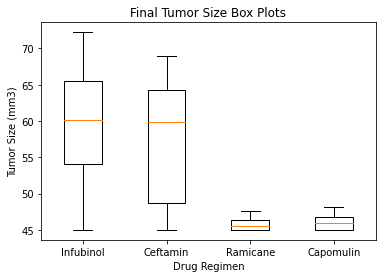

In [65]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
allTreatments = [tumorInf,tumorCef,tumorRam,tumorCap]
fig1, ax1 = plt.subplots()
ax1.boxplot(allTreatments, showfliers = True)
ax1.set_title("Final Tumor Size Box Plots")
ax1.set_ylabel("Tumor Size (mm3)")
ax1.set_xlabel("Drug Regimen")
plt.xticks([1,2,3,4],treatments)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

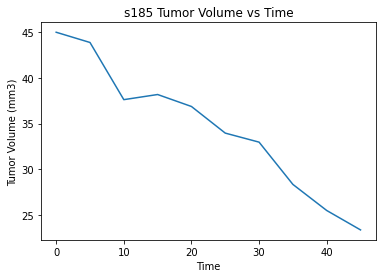

In [38]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
tumorinfoCap = allData.loc[(allData["Drug Regimen"]=="Capomulin") & (allData["Mouse ID"] == "s185"),:]
s185Vol = tumorinfoCap["Tumor Volume (mm3)"]
s185Time = tumorinfoCap["Timepoint"]
plt.plot(s185Time,s185Vol)
plt.title("s185 Tumor Volume vs Time")
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'Tumor Volume (mm3)')

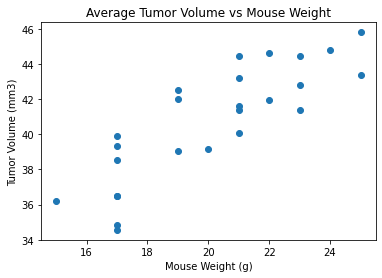

In [39]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capInfo = allData.loc[allData["Drug Regimen"]=="Capomulin",:]
capInfo = capInfo.groupby(["Mouse ID"]).mean()
avgVol = capInfo["Tumor Volume (mm3)"]
mouseWeight = capInfo["Weight (g)"]
plt.scatter(mouseWeight, avgVol)
plt.title("Average Tumor Volume vs Mouse Weight")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

## Correlation and Regression

The R-squared value is 0.7088568047708717
The linear regression equation is y = 0.95x + 21.55


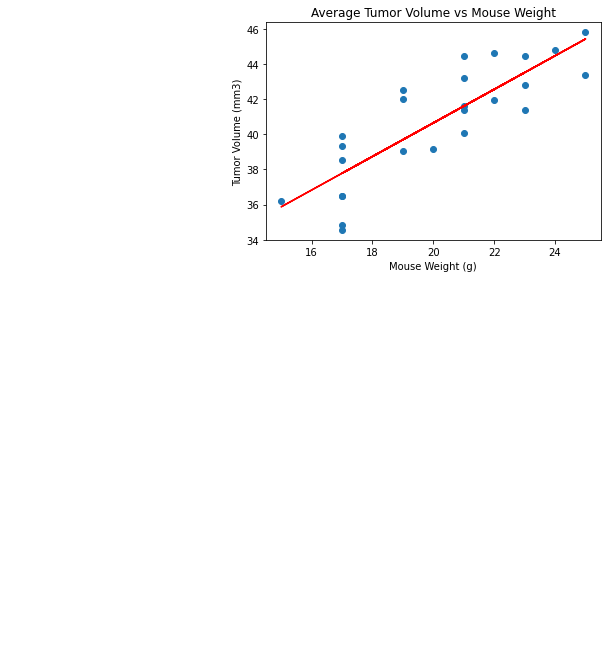

In [63]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouseWeight, avgVol)
regress_values = mouseWeight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouseWeight, avgVol)
plt.title("Average Tumor Volume vs Mouse Weight")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(mouseWeight,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The R-squared value is {rvalue**2}")
print(f"The linear regression equation is {line_eq}")